In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("sentimentdataset.csv")


In [3]:
df.columns = df.columns.str.strip()
# Remove unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Check for missing values
missing_values = df.isnull().sum()

# Display cleaned DataFrame
df.head()


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Platform usage
platform_usage = df['Platform'].value_counts()

# Hashtag analysis (splitting hashtags and counting occurrences)
df['Hashtags'] = df['Hashtags'].str.split()
all_hashtags = df['Hashtags'].explode().value_counts()

sentiment_counts, platform_usage, all_hashtags.head(10)


( Positive            44
  Joy                 42
  Excitement          32
  Happy               14
  Contentment         14
                      ..
  Heartache            1
  Sorrow               1
  Loneliness           1
  Challenge            1
  Numbness             1
 Name: Sentiment, Length: 279, dtype: int64,
  Instagram     258
  Facebook      231
  Twitter       128
  Twitter       115
 Name: Platform, dtype: int64,
 #Serenity       15
 #Gratitude      13
 #Excitement     13
 #Nostalgia      11
 #Despair        11
 #Curiosity      10
 #Contentment    10
 #Loneliness      9
 #Awe             9
 #Hopeful         9
 Name: Hashtags, dtype: int64)

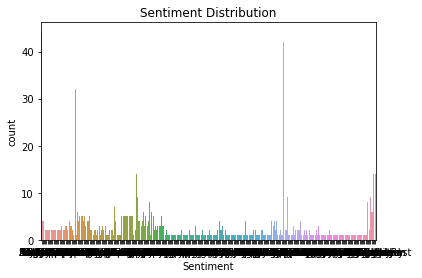

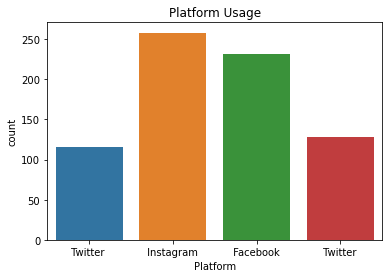

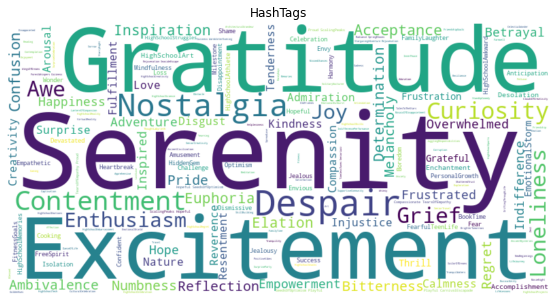

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Plot platform usage
sns.countplot(x='Platform', data=df)
plt.title('Platform Usage')
plt.show()

#: Word cloud for hashtags
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Hashtags'].explode().dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('HashTags')
plt.show()


279


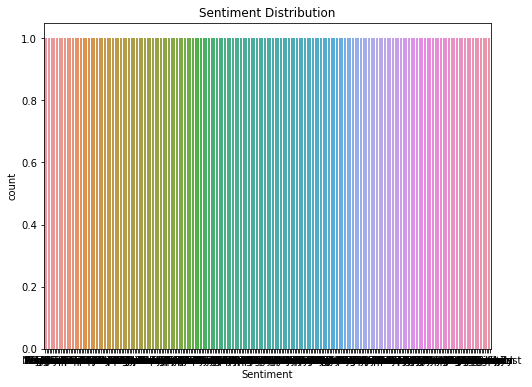

In [14]:
a=df['Sentiment'].drop_duplicates()
print(len(a))
plt.figure(figsize=(8,6))
sns.countplot(x=a)
plt.title('Sentiment Distribution')
plt.show()